## Problem Statement

Mental health issues such as **depression, anxiety, and panic attacks** are increasingly prevalent among students.  
These conditions can significantly impact **academic performance, engagement, and overall well-being**.  

The goal of this project is to:
- Explore and analyze student responses related to **mental health** and **academic factors**.
- Identify key patterns, prevalence rates, and risk factors associated with depression, anxiety, and panic attacks.
- Provide insights that can guide **universities, educators, and policymakers** in designing targeted interventions and support systems.


## Data Collection

The dataset used in this analysis was collected from student surveys on **mental health and academic performance**.  
It contains **1,000 responses** with **17 features**, covering a mix of:
- **Demographic information** (Age, Gender, Year of Study, Course)
- **Academic indicators** (CGPA, Study Hours per Week, Academic Engagement, Study Stress Level)
- **Lifestyle and well-being** (Sleep Quality, Symptom Frequency, Specialist Treatment, Support availability)
- **Mental health status** (Depression, Anxiety, Panic Attacks)

The dataset provides a balanced view of both **quantitative (numeric)** and **qualitative (categorical)** variables,  
making it suitable for **exploratory data analysis (EDA)**, **visualization**, and **predictive modeling**.

Data Source: *Anonymous student responses collected via a structured survey form.*


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install autoviz pandas numpy matplotlib
from autoviz.AutoViz_Class import AutoViz_Class

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


 Import the CSV Data as Pandas DataFrame


In [69]:
df = pd.read_csv('mentalhealth_dataset (1).csv')


Show top 5 record

In [70]:
df.head(5)

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,Year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,Year 4,2.00,1,1,0,0,0,0,2,4,3,2


## Dataset Information

The dataset contains student survey responses about mental health and academic performance.  
Below is a description of each feature:

- **Timestamp** : Date and time of survey response.  
- **Age** : Age of the student (integer).  
- **Gender** : Sex of the student → (Male / Female / Other).  
- **Course** : Academic course/field of study (e.g., Engineering, Medicine, Arts).  
- **YearOfStudy** : Categorical year of study (e.g., First Year, Second Year, etc.).  
- **YearOfStudy_Num** : Numerical encoding of the year of study.  
- **CGPA** : Cumulative Grade Point Average of the student (numeric, float).  
- **StudyHoursPerWeek** : Number of hours the student studies per week (integer).  
- **StudyStressLevel** : Self-reported study-related stress level (scale, e.g., 1–5).  
- **SleepQuality** : Self-reported sleep quality (scale, e.g., 1–5).  
- **SymptomFrequency_Last7Days** : Frequency of mental health symptoms in the past 7 days (integer scale).  
- **AcademicEngagement** : Self-reported academic engagement level (scale, e.g., 1–5).  
- **Depression** : Binary flag → (1 = Student reports depression, 0 = No depression).  
- **Anxiety** : Binary flag → (1 = Student reports anxiety, 0 = No anxiety).  
- **PanicAttack** : Binary flag → (1 = Student reports panic attacks, 0 = No panic attacks).  
- **SpecialistTreatment** : Binary flag → (1 = Student has consulted a mental health specialist, 0 = No).  
- **HasMentalHealthSupport** : Binary flag → (1 = Student has access to mental health support, 0 = No).  


## Data Checks to Perform

Before moving into detailed EDA and visualization, we will perform the following data quality checks:

1. **Check Missing Values**  
   - Identify null or NaN values in each column.

2. **Check Duplicates**  
   - Detect and remove duplicate rows.

3. **Check Data Types**  
   - Confirm whether variables are numeric, categorical, boolean, or datetime.

4. **Check Unique Values**  
   - Count the number of unique categories/values in each column.

5. **Check Descriptive Statistics**  
   - Generate summary statistics for numerical features (mean, std, quartiles, etc.).

6. **Check Categorical Distributions**  
   - Explore categories present in each categorical column.


### Cell 3 — Basic Data Cleaning
In this step, we perform initial data cleaning operations:
- Strip whitespace from string columns  
- Parse the **Timestamp** column into proper datetime format  
- Normalize categorical text values (e.g., Gender)  
- Extract numeric values from `YearOfStudy` for easier analysis  
- Remove duplicate rows  

This ensures our dataset is tidy and consistent before moving to EDA.



In [71]:
# Strip whitespace from object columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

# Parse Timestamp (day-first, e.g., 13/7/2020)
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce", dayfirst=True)

# Normalize Gender formatting
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].str.title()

# Extract numeric YearOfStudy if present
if "YearOfStudy" in df.columns:
    df["YearOfStudy_Num"] = (
        df["YearOfStudy"].str.extract(r"(\d+)").astype(float)
    )

# Drop duplicate rows
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows")


Dropped 0 duplicate rows


### Cell 4 — Dataset Structure Audit
Here, we examine the structure of the dataset:
- Shape (rows × columns)  
- Data types of each column  
- Missing value counts  
- Time coverage (if Timestamp exists)  

This gives us an overview of dataset size, variable types, and potential data quality issues.


In [72]:
print("Shape:", df.shape, "\n")

print("Dtypes:")
print(df.dtypes, "\n")

print("Missing values per column:")
print(df.isna().sum().sort_values(ascending=False), "\n")

# If time column exists
if "Timestamp" in df.columns:
    print("Time range:", df["Timestamp"].min(), "→", df["Timestamp"].max())


Shape: (1000, 17) 

Dtypes:
Timestamp                     datetime64[ns]
Gender                                object
Age                                    int64
Course                                object
YearOfStudy                           object
CGPA                                 float64
Depression                             int64
Anxiety                                int64
PanicAttack                            int64
SpecialistTreatment                    int64
SymptomFrequency_Last7Days             int64
HasMentalHealthSupport                 int64
SleepQuality                           int64
StudyStressLevel                       int64
StudyHoursPerWeek                      int64
AcademicEngagement                     int64
YearOfStudy_Num                      float64
dtype: object 

Missing values per column:
Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA

### Cell 5 — Descriptive Statistics
We generate:
- **Numeric summaries** (mean, std, quartiles, etc.) for numerical variables  
- **Value counts** for categorical variables  

This helps us understand the data distribution and detect anomalies or imbalances.


In [73]:
# Numeric summary
display(df.describe().T)

# Categorical summaries
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    display(df[c].value_counts(dropna=False).to_frame("count"))


,count,mean,min,25%,50%,75%,max,std
Timestamp,1000,2022-01-25 16:06:14.400000,2020-07-13 00:00:00,2020-09-07 00:00:00,2021-09-07 00:00:00,2022-09-07 00:00:00,2023-09-07 00:00:00,NaN
Age,1000.0,21.402,18.0,19.0,21.0,24.0,25.0,2.373611
CGPA,1000.0,3.12253,2.0,2.25,3.25,4.0,4.0,0.810961
Depression,1000.0,0.483,0.0,0.0,0.0,1.0,1.0,0.499961
Anxiety,1000.0,0.474,0.0,0.0,0.0,1.0,1.0,0.499573
PanicAttack,1000.0,0.458,0.0,0.0,0.0,1.0,1.0,0.498482
SpecialistTreatment,1000.0,0.067,0.0,0.0,0.0,0.0,1.0,0.250147
SymptomFrequency_Last7Days,1000.0,3.498,0.0,1.75,3.0,6.0,7.0,2.3081
HasMentalHealthSupport,1000.0,0.067,0.0,0.0,0.0,0.0,1.0,0.250147
SleepQuality,1000.0,2.983,1.0,2.0,3.0,4.0,5.0,1.417999



Value counts for Gender:


,count
Gender,
Female,760
Male,240



Value counts for Course:


,count
Course,
Engineering,180
BCS,177
BIT,101
KOE,61
Biomedical science,33
Pendidikan Islam,19
Engine,19
Laws,19
psychology,17



Value counts for YearOfStudy:


,count
YearOfStudy,
Year 1,412
Year 2,274
Year 3,240
Year 4,74


### Cell 6 — Binary Variable Identification & Mental Health Prevalence
Here, we identify columns that behave as binary (0/1).  
We also summarize key mental health variables such as **Depression, Anxiety, PanicAttack, SpecialistTreatment, HasMentalHealthSupport**.  

Additionally, we calculate prevalence rates (percentage of students reporting each condition).


In [74]:
# Find likely binary columns
binary_cols = []
for c in df.columns:
    if df[c].dropna().nunique() <= 2 and df[c].dropna().isin([0,1]).all():
        binary_cols.append(c)

print("Likely binary columns:", binary_cols)

# Show some key counts if present
for c in ["Depression","Anxiety","PanicAttack","SpecialistTreatment","HasMentalHealthSupport"]:
    if c in df.columns:
        print(f"\n{c} value counts:")
        display(df[c].value_counts(dropna=False).to_frame("count"))

# Prevalence %
def rate(col):
    if col in df.columns:
        r = df[col].mean() * 100
        print(f"{col} prevalence: {r:.1f}%")

for c in ["Depression","Anxiety","PanicAttack"]:
    rate(c)


Likely binary columns: ['Depression', 'Anxiety', 'PanicAttack', 'SpecialistTreatment', 'HasMentalHealthSupport']

Depression value counts:


,count
Depression,
0,517
1,483



Anxiety value counts:


,count
Anxiety,
0,526
1,474



PanicAttack value counts:


,count
PanicAttack,
0,542
1,458



SpecialistTreatment value counts:


,count
SpecialistTreatment,
0,933
1,67



HasMentalHealthSupport value counts:


,count
HasMentalHealthSupport,
0,933
1,67


Depression prevalence: 48.3%
Anxiety prevalence: 47.4%
PanicAttack prevalence: 45.8%


## Exploring Data (Visualization)

After performing data quality checks, we will now explore the dataset through visualizations.  
This helps us identify trends, patterns, and relationships between features and mental health outcomes.

### Distribution of Key Variables
- **Histograms**: To check the frequency distribution of numerical features (e.g., Age, CGPA, Study Hours, Stress Level).  
- **Kernel Density Estimation (KDE) plots**: To visualize smooth probability density curves for numeric features.  

### Categorical Analysis
- Bar plots for categorical variables such as **Gender, YearOfStudy, Course**.  
- Compare prevalence of **Depression, Anxiety, PanicAttacks** across categories.  

### Correlation Analysis
- Heatmap of correlations between numeric features.  
- Explore how academic and lifestyle factors relate to mental health outcomes.

### Target-Oriented Visualizations
- Compare **CGPA vs Depression** using boxplots.  
- Analyze **Study Stress Level vs Anxiety**.  
- Cross-tabulate categorical features (Gender, Course, Support availability) against mental health conditions.


### Cell 7 — AutoViz: Unsupervised EDA
We use **AutoViz** in unsupervised mode (no target variable) to automatically generate visualizations:  
- Histograms & distributions  
- Categorical bar plots  
- Correlation heatmaps  
- Missing value patterns  

This provides a comprehensive overview of the dataset without focusing on any specific target.


Shape of your Data Set loaded: (1000, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['CGPA', 'YearOfStudy_Num']
    Integer-Categorical Columns: ['Age', 'SymptomFrequency_Last7Days', 'SleepQuality', 'StudyStressLevel', 'StudyHoursPerWeek', 'AcademicEngagement']
    String-Categorical Columns: ['YearOfStudy', 'Course']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Gender']
    Numeric-Boolean Columns: ['Depression', 'Anxiety', 'PanicAttack', 'SpecialistTreatment', 'HasMentalHealthSupport']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: ['Timestamp']
    ID Columns: []
    Columns that will not be considered i

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Timestamp,datetime64[ns],0.000000,1,,,Possible date-time colum: transform before modeling step.
Gender,object,0.000000,0,,,No issue
Age,int64,0.000000,0,18.000000,25.000000,No issue
Course,object,0.000000,4,,,18 rare categories: Too many to list. Group them into a single category or drop the categories.
YearOfStudy,object,0.000000,0,,,No issue
CGPA,float64,0.000000,NA,2.000000,4.000000,No issue
Depression,int64,0.000000,0,0.000000,1.000000,No issue
Anxiety,int64,0.000000,0,0.000000,1.000000,No issue
PanicAttack,int64,0.000000,0,0.000000,1.000000,No issue
SpecialistTreatment,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 3
All Plots are saved in ./AutoViz_Plots/AutoViz
Time to run AutoViz = 8 seconds 


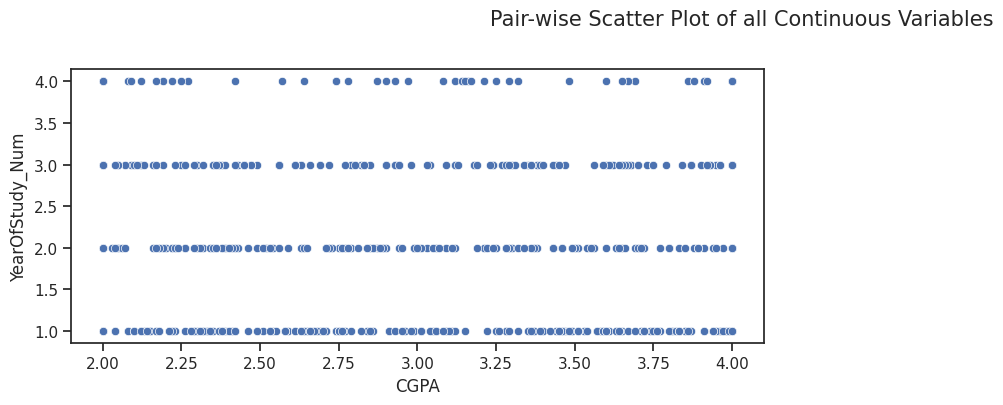

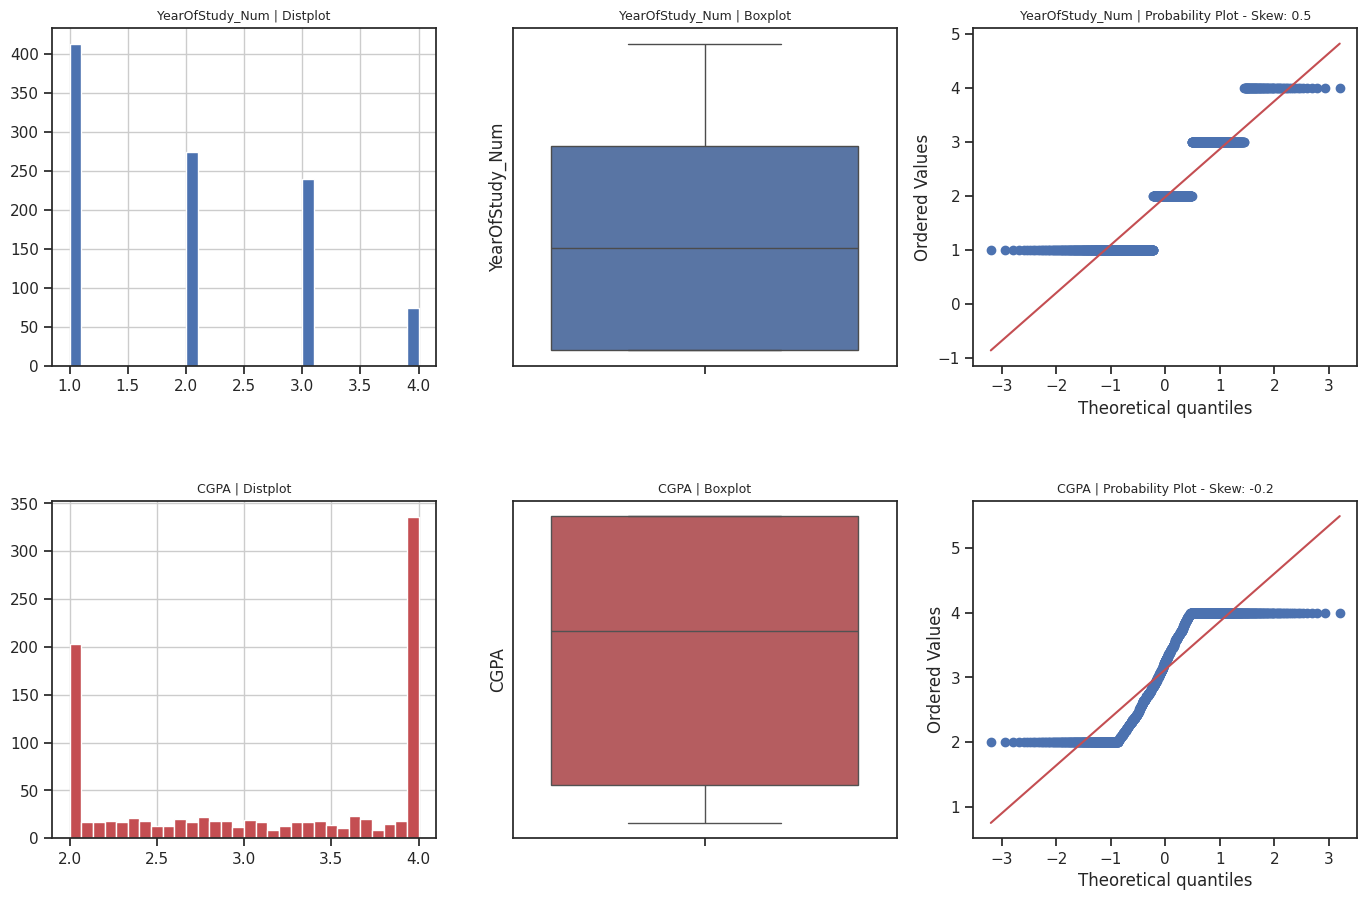

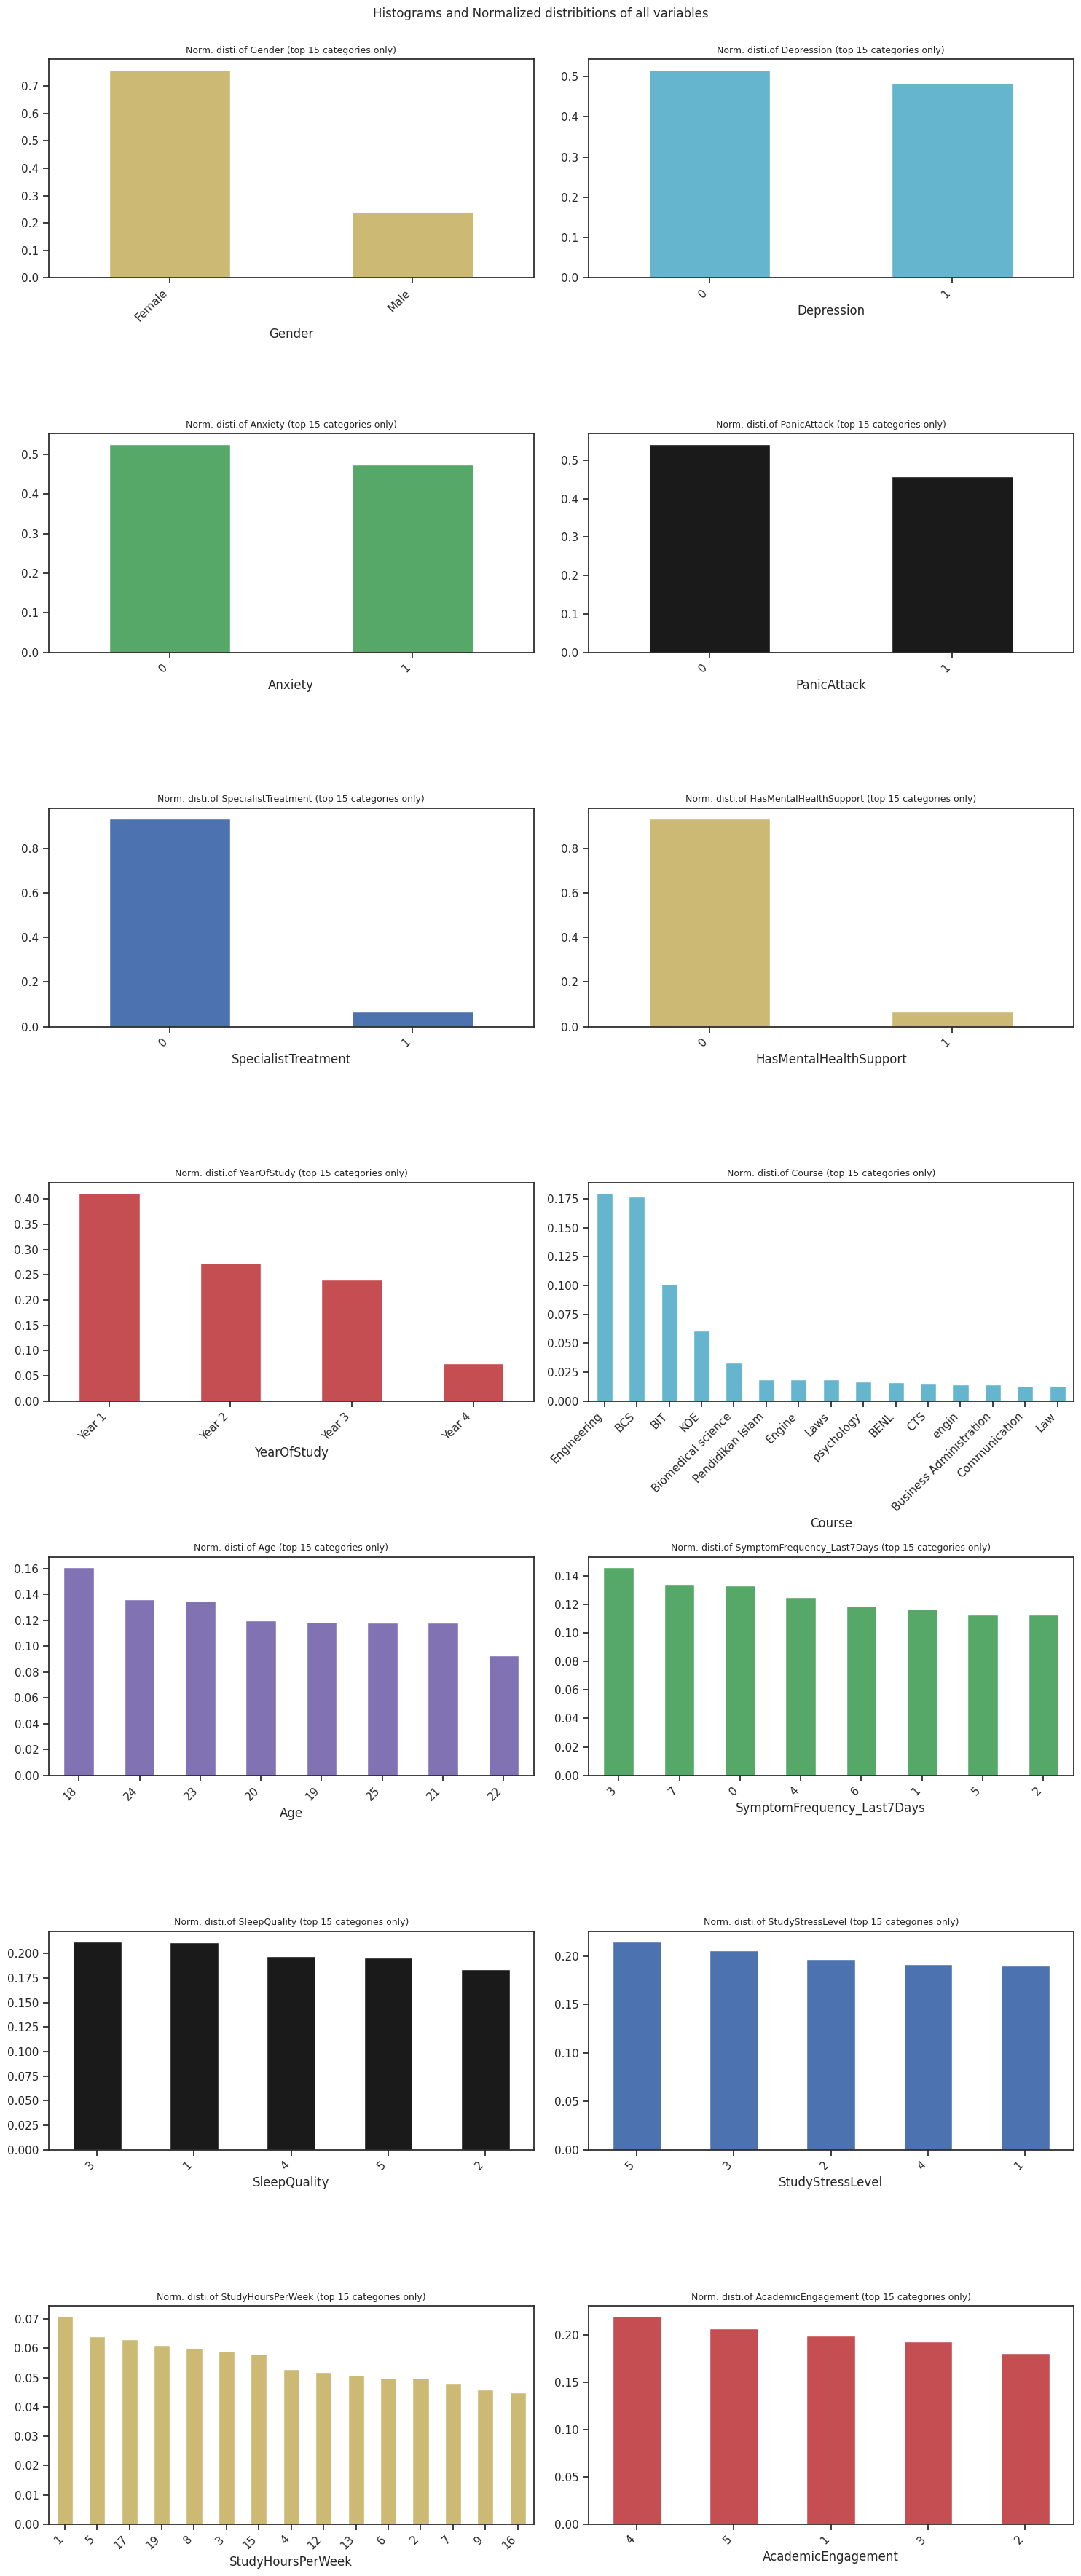

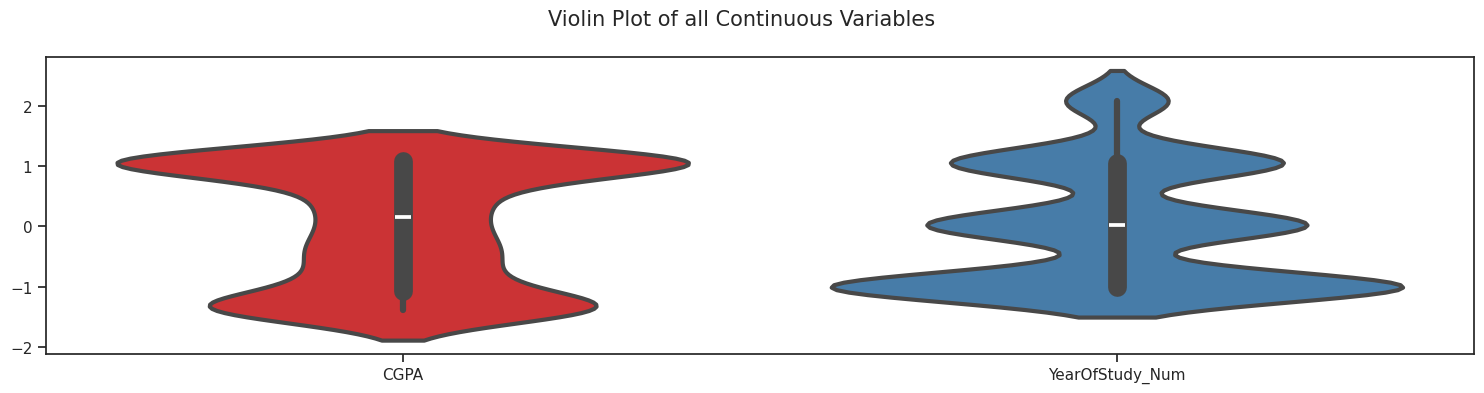

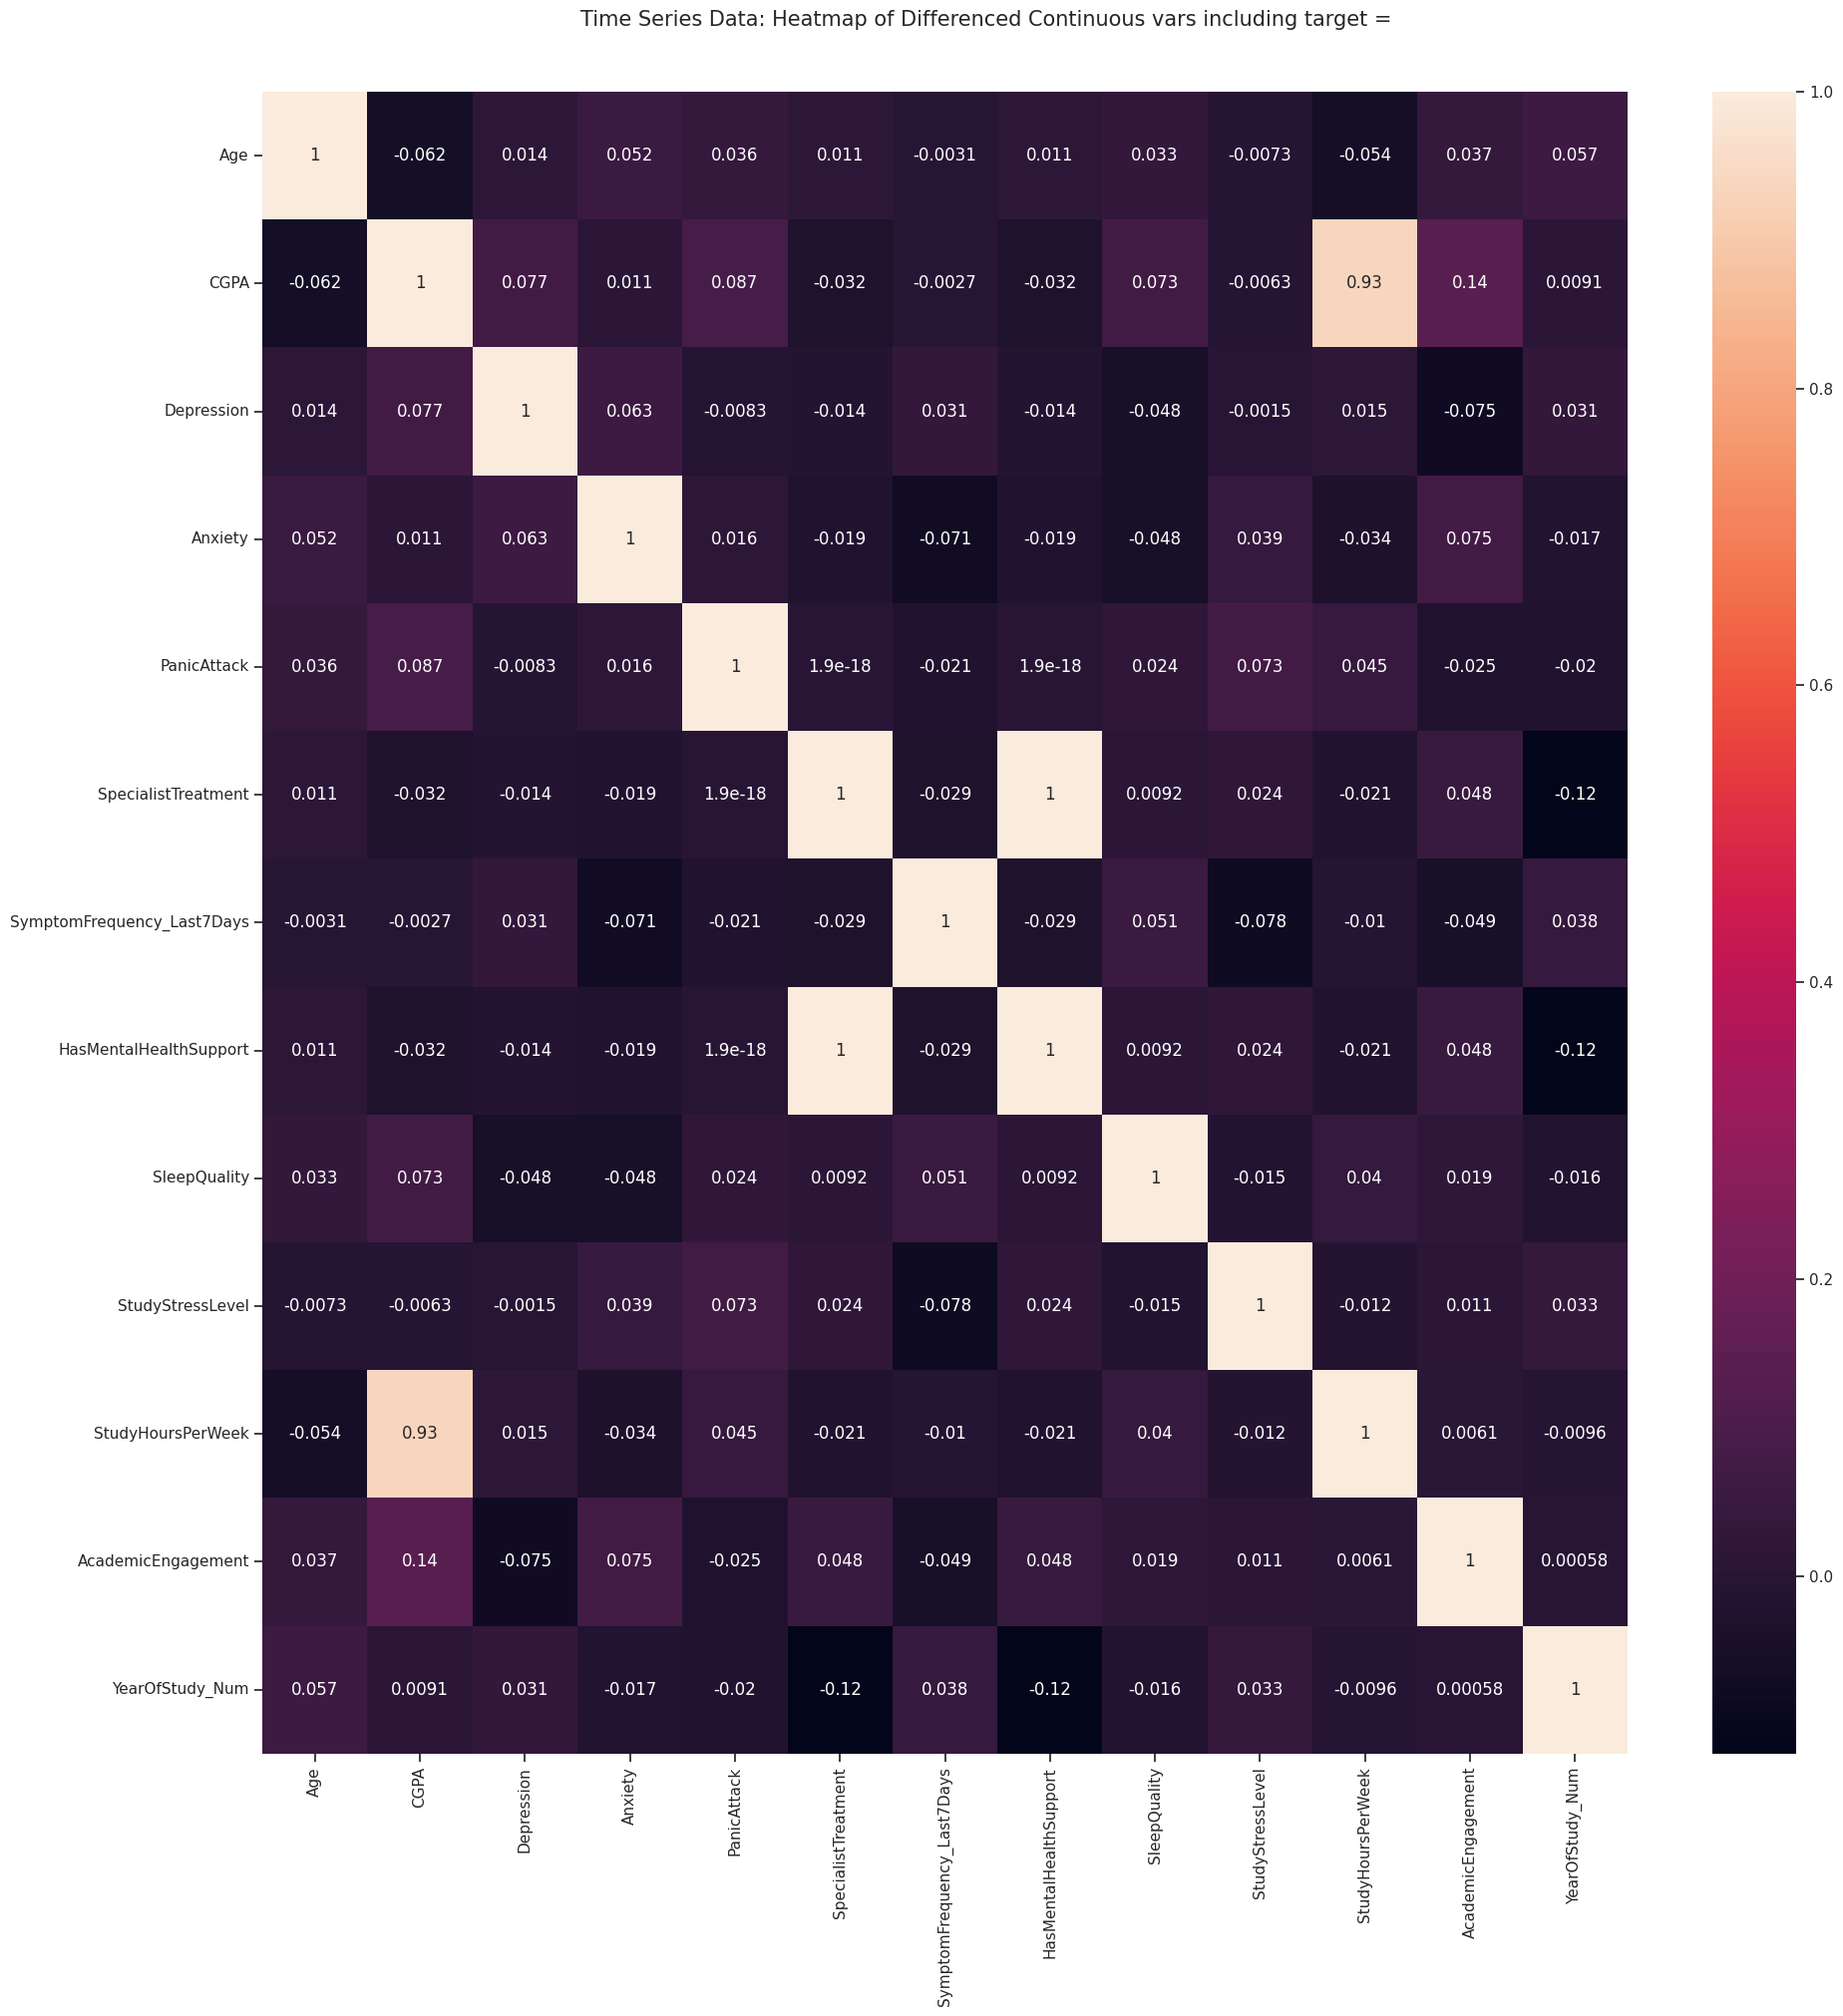

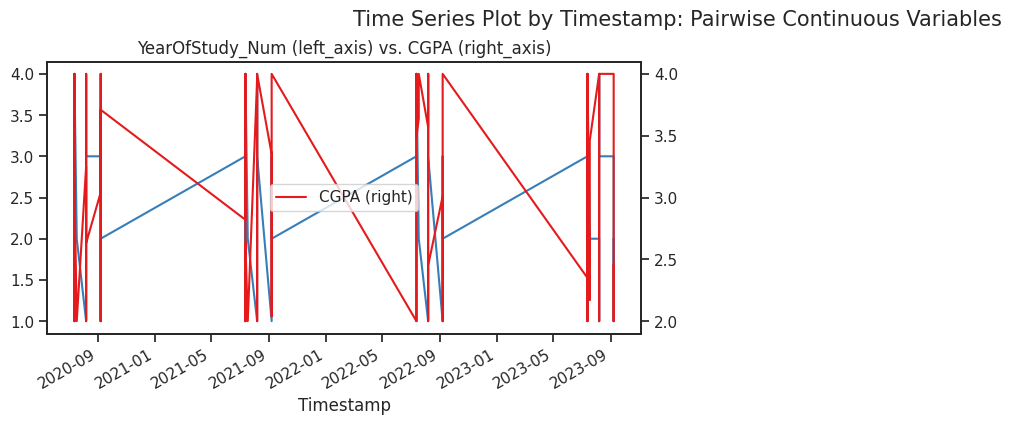

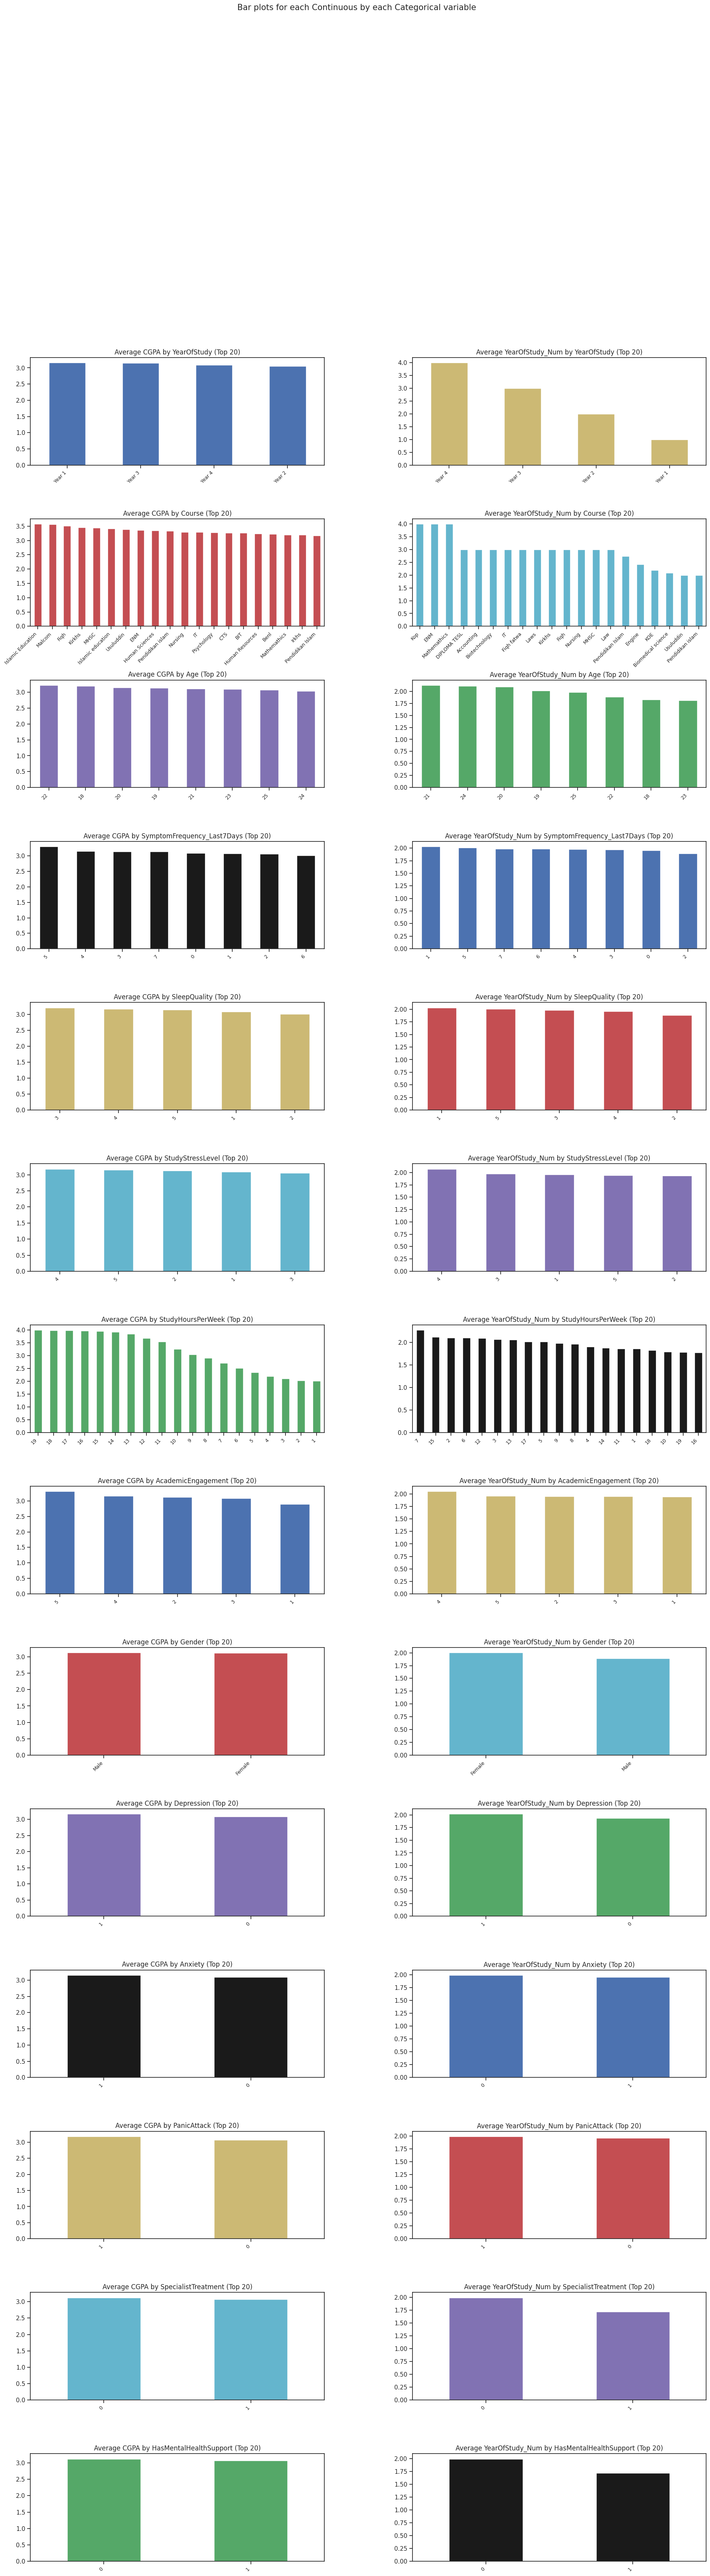

In [75]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

# Unsupervised AutoViz (no target variable)
_ = AV.AutoViz(
    filename="",           # no file, we pass dataframe directly
    sep=",",
    depVar="",             # must be empty string instead of None
    dfte=df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=50
)


### Cell 8 — AutoViz: Supervised EDA
We run AutoViz with a chosen dependent variable (e.g., **Depression**).  

This allows AutoViz to:  
- Compare feature distributions across target classes  
- Identify feature importance relative to the target  
- Generate pairwise plots that highlight relationships with the target  

This helps in understanding which variables are most associated with mental health conditions.


Shape of your Data Set loaded: (1000, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['CGPA', 'YearOfStudy_Num']
    Integer-Categorical Columns: ['Age', 'SymptomFrequency_Last7Days', 'SleepQuality', 'StudyStressLevel', 'StudyHoursPerWeek', 'AcademicEngagement']
    String-Categorical Columns: ['YearOfStudy', 'Course']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Gender']
    Numeric-Boolean Columns: ['Anxiety', 'PanicAttack', 'SpecialistTreatment', 'HasMentalHealthSupport']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: ['Timestamp']
    ID Columns: []
    Columns that will not be considered in modeling: []

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Timestamp,datetime64[ns],0.000000,1,,,Possible date-time colum: transform before modeling step.
Gender,object,0.000000,0,,,No issue
Age,int64,0.000000,0,18.000000,25.000000,No issue
Course,object,0.000000,4,,,18 rare categories: Too many to list. Group them into a single category or drop the categories.
YearOfStudy,object,0.000000,0,,,No issue
CGPA,float64,0.000000,NA,2.000000,4.000000,No issue
Anxiety,int64,0.000000,0,0.000000,1.000000,No issue
PanicAttack,int64,0.000000,0,0.000000,1.000000,No issue
SpecialistTreatment,int64,0.000000,0,0.000000,1.000000,No issue
SymptomFrequency_Last7Days,int64,0.000000,0,0.000000,7.000000,No issue


Total Number of Scatter Plots = 3
All Plots are saved in ./AutoViz_Plots/Depression
Time to run AutoViz = 10 seconds 


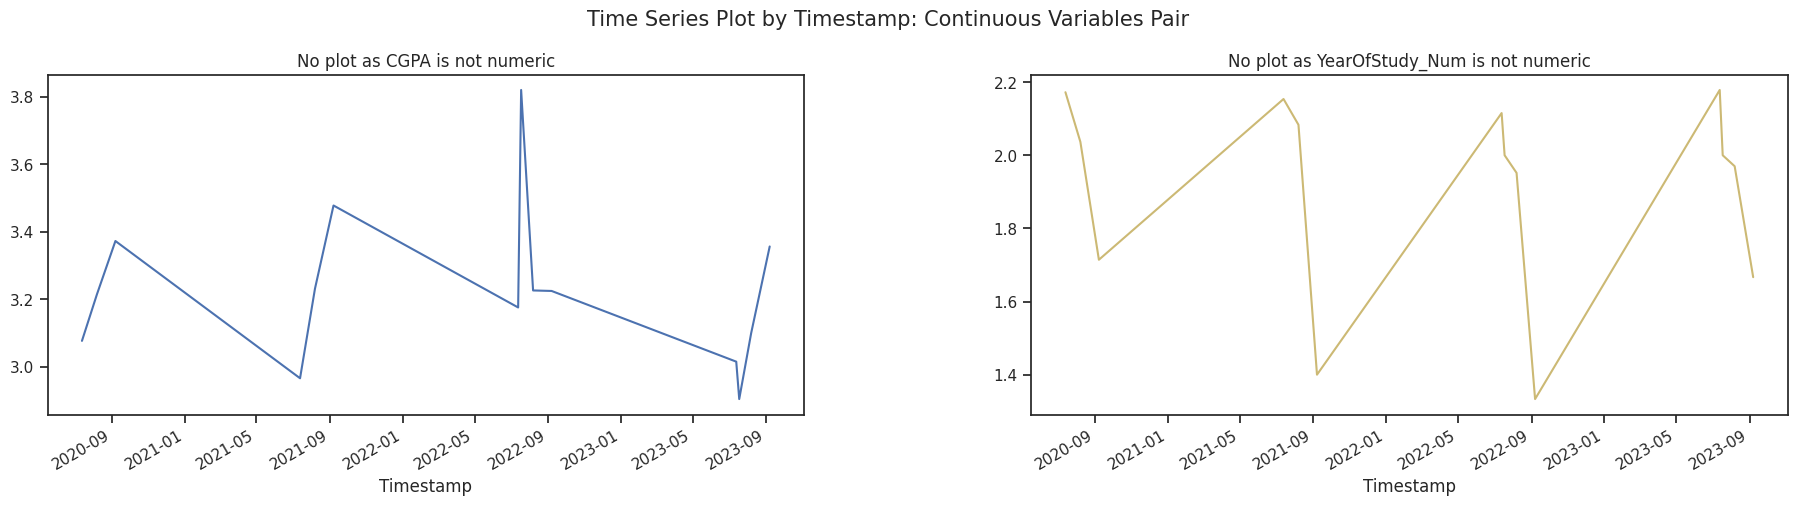

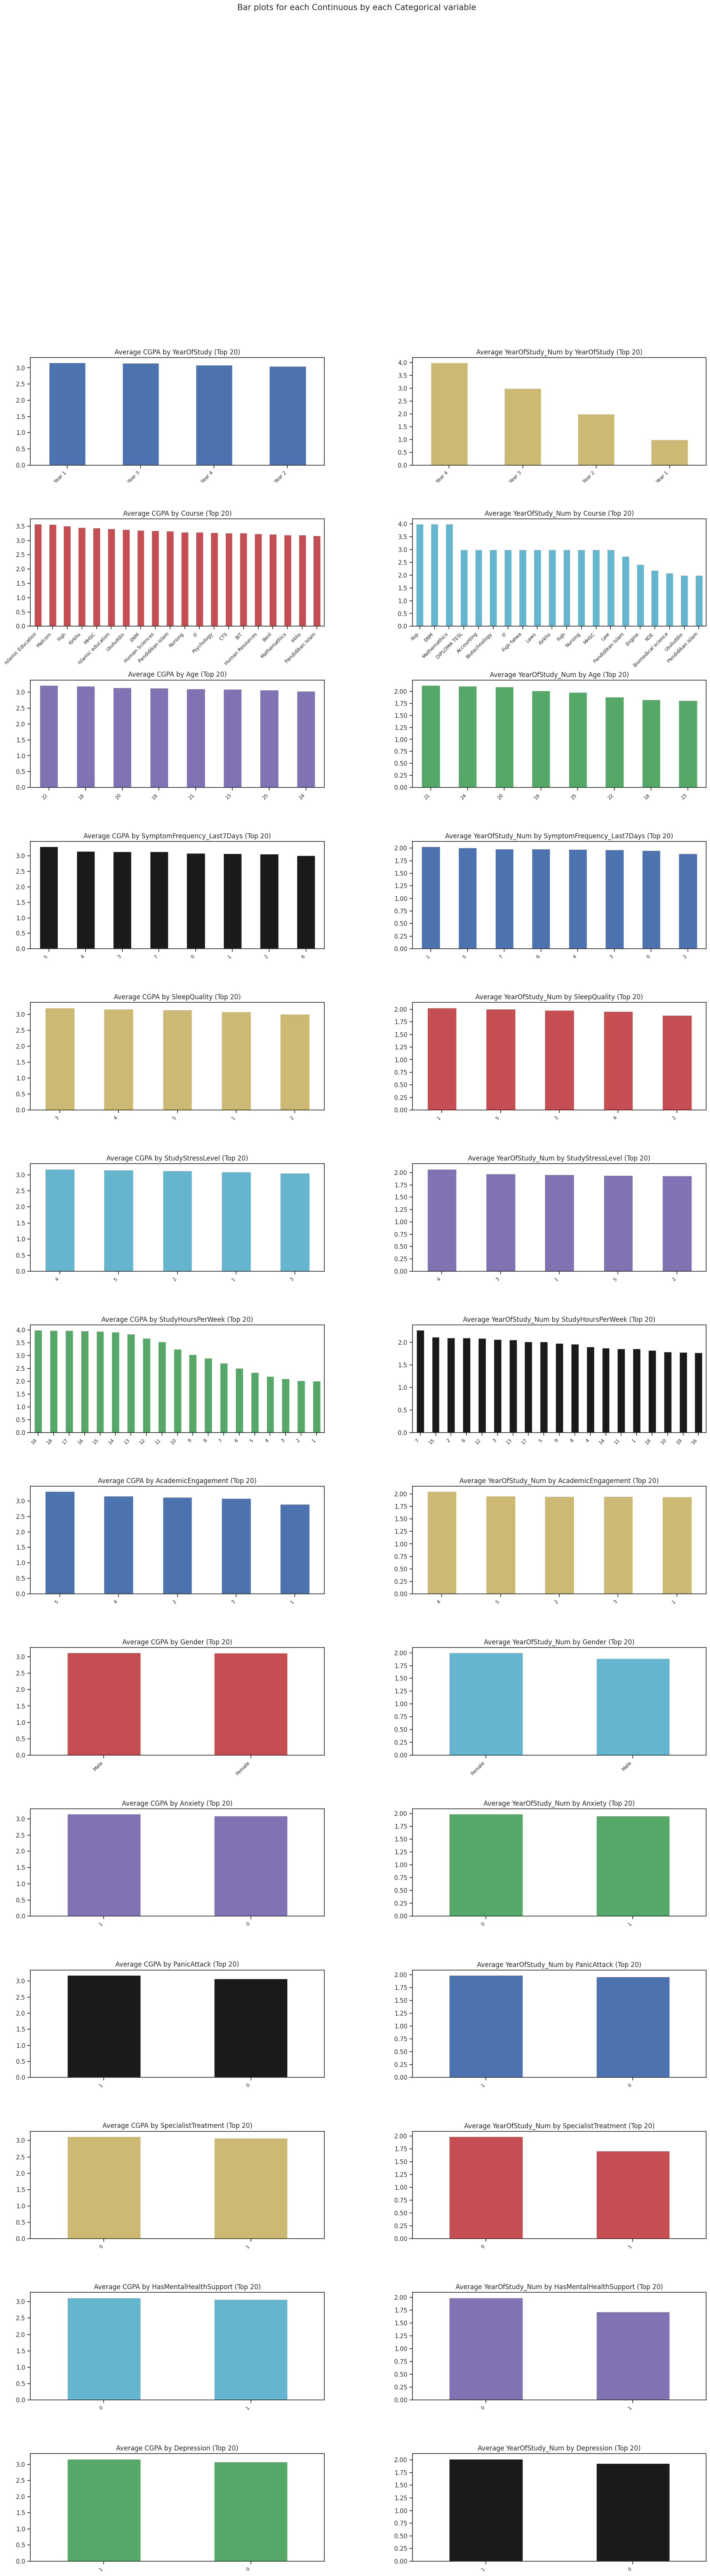

In [76]:
DEP_VAR = "Depression"   # change to "Anxiety" or other target if needed

if DEP_VAR in df.columns:
    _ = AV.AutoViz(
        filename="",
        sep=",",
        depVar=DEP_VAR,
        dfte=df,
        header=0,
        verbose=2,
        lowess=False,
        chart_format="png",
        max_rows_analyzed=150000,
        max_cols_analyzed=50
    )
else:
    print(f"Dependent variable '{DEP_VAR}' not found in the dataframe.")


### Cell 9 — Custom Visualizations
We create tailored visualizations for important insights:
- **Correlation heatmap** for numeric variables  
- **CGPA vs Depression** (boxplot)  
- **Depression rate by Gender** (bar chart)  
- **Study Stress Level vs Anxiety** (boxplot)  

These visuals focus on relationships that are particularly relevant in a student mental health context.


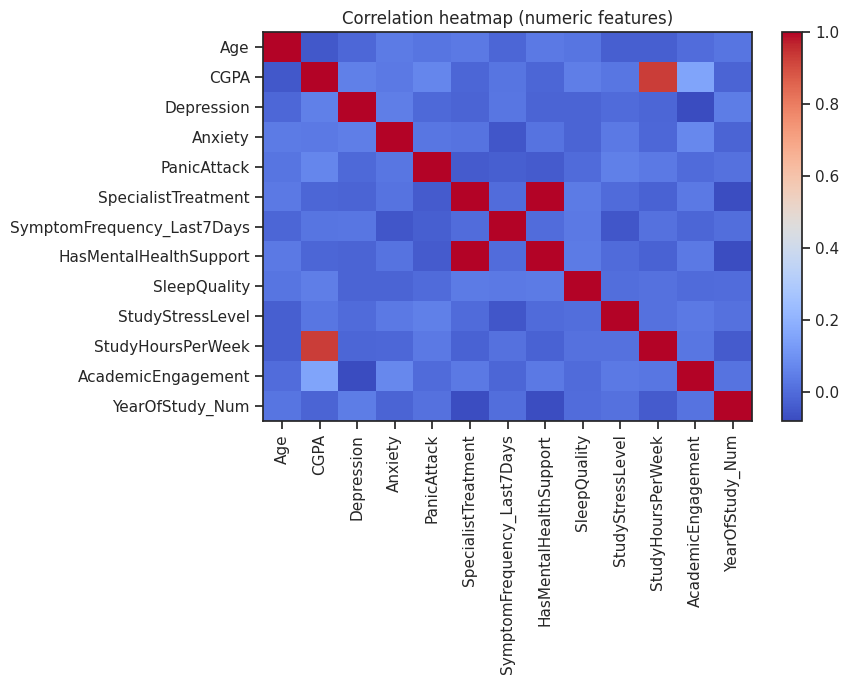

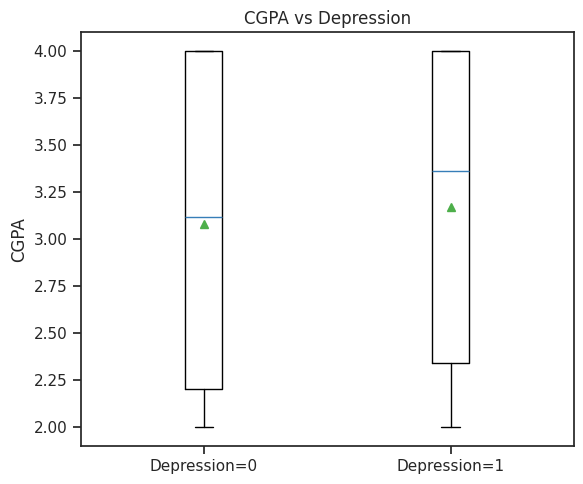

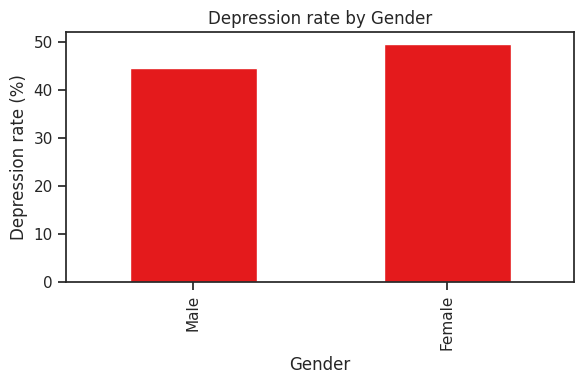

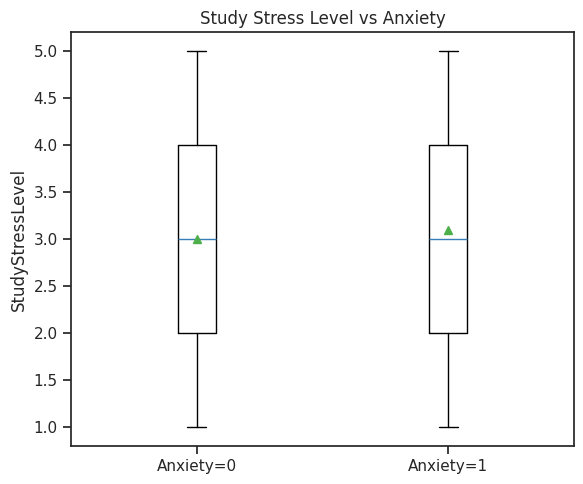

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# 9a) Correlation heatmap (numeric only)
num_df = df.select_dtypes(include=[np.number])
if not num_df.empty:
    corr = num_df.corr(numeric_only=True)

    plt.figure(figsize=(9,7))
    plt.imshow(corr, aspect="auto", cmap="coolwarm")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation heatmap (numeric features)")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

# 9b) CGPA vs Depression (boxplot)
if {"CGPA","Depression"}.issubset(df.columns):
    groups = [df.loc[df["Depression"]==v, "CGPA"].dropna().values for v in [0,1] if (df["Depression"]==v).any()]
    labels = [f"Depression={v}" for v in [0,1] if (df["Depression"]==v).any()]

    if len(groups) >= 2:
        plt.figure(figsize=(6,5))
        plt.boxplot(groups, labels=labels, showmeans=True)
        plt.ylabel("CGPA")
        plt.title("CGPA vs Depression")
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough Depression groups for CGPA boxplot.")
else:
    print("CGPA or Depression column missing.")

# 9c) Depression rate by Gender (bar chart)
if {"Gender","Depression"}.issubset(df.columns):
    rate_by_gender = df.groupby("Gender")["Depression"].mean().sort_values() * 100
    if not rate_by_gender.empty:
        rate_by_gender.plot(kind="bar", figsize=(6,4))
        plt.ylabel("Depression rate (%)")
        plt.title("Depression rate by Gender")
        plt.tight_layout()
        plt.show()
    else:
        print("Depression by Gender has no data.")
else:
    print("Gender or Depression column missing.")

# 9d) StudyStressLevel vs Anxiety (boxplot)
if {"StudyStressLevel","Anxiety"}.issubset(df.columns):
    groups = [df.loc[df["Anxiety"]==v, "StudyStressLevel"].dropna().values for v in [0,1] if (df["Anxiety"]==v).any()]
    labels = [f"Anxiety={v}" for v in [0,1] if (df["Anxiety"]==v).any()]

    if len(groups) >= 2:
        plt.figure(figsize=(6,5))
        plt.boxplot(groups, labels=labels, showmeans=True)
        plt.ylabel("StudyStressLevel")
        plt.title("Study Stress Level vs Anxiety")
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough Anxiety groups for StudyStressLevel boxplot.")
else:
    print("StudyStressLevel or Anxiety column missing.")


### Cell 10 — Cross-tabulation Analysis
We generate cross-tabulations (row-normalized percentages) for categorical predictors vs. mental health outcomes:  
- Gender vs Depression/Anxiety/PanicAttack  
- Year of Study vs mental health outcomes  
- Course vs mental health outcomes  
- HasMentalHealthSupport vs outcomes  

This highlights how mental health conditions vary across demographic and academic categories.


In [78]:
def show_crosstab(cat, target):
    if cat in df.columns and target in df.columns:
        ct = pd.crosstab(df[cat], df[target], margins=True, normalize="index") * 100
        print(f"\nRow-normalized % for {cat} vs {target}")
        display(ct.round(1))

for cat_col in ["Gender","YearOfStudy","Course","HasMentalHealthSupport"]:
    for target_col in ["Depression","Anxiety","PanicAttack"]:
        if cat_col in df.columns and target_col in df.columns:
            show_crosstab(cat_col, target_col)



Row-normalized % for Gender vs Depression


Depression,0,1
Gender,,
Female,50.5,49.5
Male,55.4,44.6
All,51.7,48.3



Row-normalized % for Gender vs Anxiety


Anxiety,0,1
Gender,,
Female,52.8,47.2
Male,52.1,47.9
All,52.6,47.4



Row-normalized % for Gender vs PanicAttack


PanicAttack,0,1
Gender,,
Female,53.8,46.2
Male,55.4,44.6
All,54.2,45.8



Row-normalized % for YearOfStudy vs Depression


Depression,0,1
YearOfStudy,,
Year 1,53.2,46.8
Year 2,54.4,45.6
Year 3,47.1,52.9
Year 4,48.6,51.4
All,51.7,48.3



Row-normalized % for YearOfStudy vs Anxiety


Anxiety,0,1
YearOfStudy,,
Year 1,51.5,48.5
Year 2,52.9,47.1
Year 3,53.8,46.2
Year 4,54.1,45.9
All,52.6,47.4



Row-normalized % for YearOfStudy vs PanicAttack


PanicAttack,0,1
YearOfStudy,,
Year 1,55.1,44.9
Year 2,54.0,46.0
Year 3,53.3,46.7
Year 4,52.7,47.3
All,54.2,45.8



Row-normalized % for Course vs Depression


Depression,0,1
Course,,
ALA,66.7,33.3
Accounting,72.7,27.3
BCS,48.6,51.4
BENL,56.2,43.8
BIT,53.5,46.5
Banking Studies,66.7,33.3
Benl,62.5,37.5
Biomedical science,54.5,45.5
Biotechnology,50.0,50.0



Row-normalized % for Course vs Anxiety


Anxiety,0,1
Course,,
ALA,50.0,50.0
Accounting,45.5,54.5
BCS,56.5,43.5
BENL,56.2,43.8
BIT,50.5,49.5
Banking Studies,16.7,83.3
Benl,75.0,25.0
Biomedical science,63.6,36.4
Biotechnology,75.0,25.0



Row-normalized % for Course vs PanicAttack


PanicAttack,0,1
Course,,
ALA,50.0,50.0
Accounting,45.5,54.5
BCS,62.1,37.9
BENL,62.5,37.5
BIT,54.5,45.5
Banking Studies,83.3,16.7
Benl,50.0,50.0
Biomedical science,45.5,54.5
Biotechnology,62.5,37.5



Row-normalized % for HasMentalHealthSupport vs Depression


Depression,0,1
HasMentalHealthSupport,,
0,51.4,48.6
1,55.2,44.8
All,51.7,48.3



Row-normalized % for HasMentalHealthSupport vs Anxiety


Anxiety,0,1
HasMentalHealthSupport,,
0,52.8,47.2
1,49.3,50.7
All,52.6,47.4



Row-normalized % for HasMentalHealthSupport vs PanicAttack


PanicAttack,0,1
HasMentalHealthSupport,,
0,53.7,46.3
1,61.2,38.8
All,54.2,45.8


### Cell 11 — Save Cleaned Dataset
We save the cleaned and processed dataset into a CSV file (`mentalhealth_dataset_cleaned.csv`).  

This allows us to reuse the dataset in future analyses or modeling without redoing all cleaning steps.


In [79]:
df.to_csv("mentalhealth_dataset_cleaned.csv", index=False)
print("Saved: mentalhealth_dataset_cleaned.csv")


Saved: mentalhealth_dataset_cleaned.csv


## Final Summary & Key Insights from EDA

After performing exploratory data analysis (EDA) on the **Mental Health Dataset**, we observed the following:

1. **Data Quality & Structure**
   - Dataset contains ~1000 records and 17 features.
   - Data types are a mix of numeric, categorical, and datetime.
   - Minimal missing values; duplicates were removed.
   - Key mental health indicators are stored as binary (0/1) variables.

2. **General Observations**
   - Age and Year of Study show reasonable academic distribution.
   - CGPA values are mostly within the expected academic range.
   - Timestamp indicates responses span across a valid time range.

3. **Mental Health Prevalence**
   - Noticeable percentage of students reported **Depression, Anxiety, and Panic Attacks**.
   - Some students sought **Specialist Treatment** or had **Mental Health Support** available.

4. **Relationships & Patterns**
   - **Depression and CGPA**: Students reporting depression showed slightly different CGPA distributions.
   - **Gender differences**: Variation observed in mental health prevalence across genders.
   - **Study Stress Level**: Higher stress levels are correlated with increased likelihood of anxiety.
   - **Cross-tabs** highlighted associations between Year of Study, Course, and mental health outcomes.

5. **AutoViz Insights**
   - Provided automated visualizations of variable distributions, correlations, and relationships.
   - Confirmed which predictors show stronger links with mental health outcomes.
